In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [31]:
df_visualization_nomial=df[['sex','smoker', 'region']].copy()

In [32]:
df_visualization_nomial.columns

Index(['sex', 'smoker', 'region'], dtype='object')

male      676
female    662
Name: sex, dtype: int64


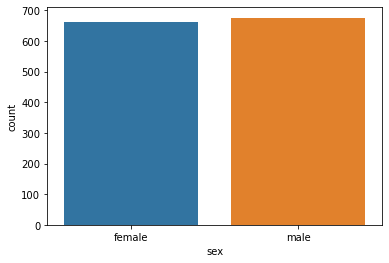

In [22]:
ax= sns.countplot(x='sex',data=df_visualization_nomial)
print(df_visualization_nomial['sex'].value_counts())


no     1064
yes     274
Name: smoker, dtype: int64


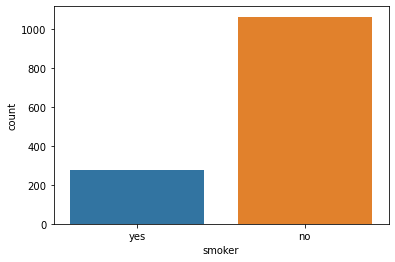

In [28]:
ax= sns.countplot(x='smoker',data=df_visualization_nomial)
print(df_visualization_nomial['smoker'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


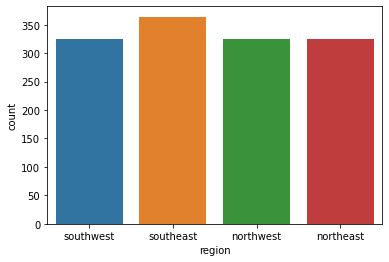

In [30]:
ax= sns.countplot(x='region',data=df_visualization_nomial)
print(df_visualization_nomial['region'].value_counts())

In [ ]:
Checking the visualization on continuous values

In [48]:
df_visualization_continuous=df[["charges"]].copy()

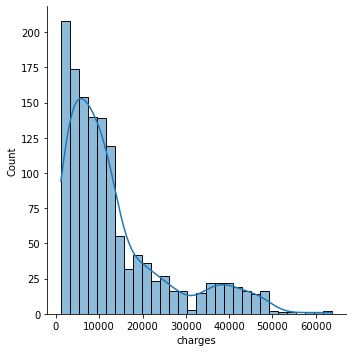

In [49]:
sns.displot(df_visualization_continuous["charges"], kde=True)

In [51]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()

In [201]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1),inplace=True)

In [202]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [203]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<function matplotlib.pyplot.show(close=None, block=None)>

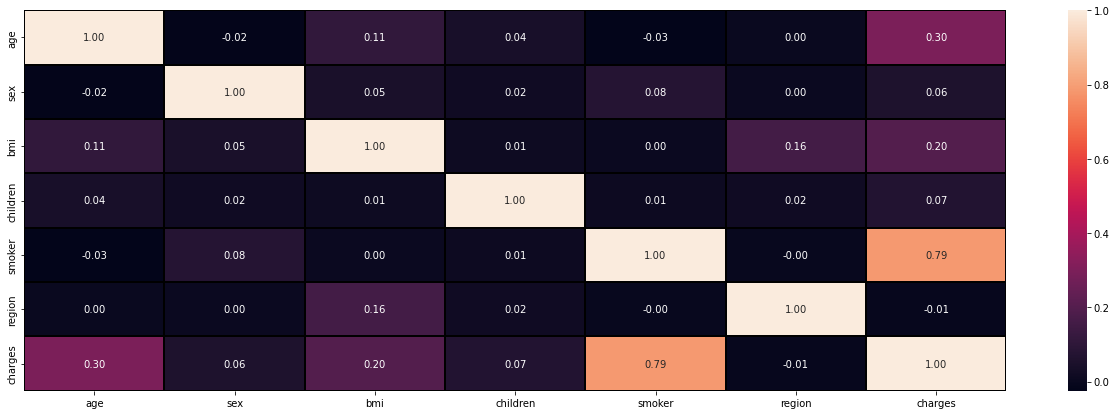

In [59]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor='black', fmt='0.2f')
plt.show

In [62]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

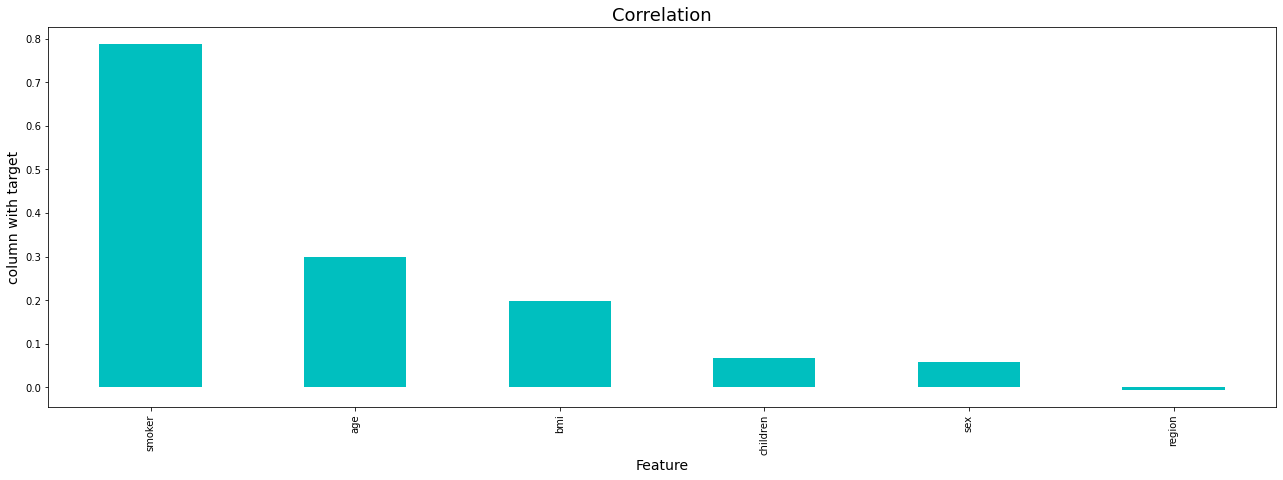

In [67]:
plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target', fontsize=14)
plt.title('Correlation', fontsize=18)
plt.show()

In [69]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [70]:
df.dtypes

age           int64
sex         float64
bmi         float64
children      int64
smoker      float64
region      float64
charges     float64
dtype: object

<AxesSubplot:>

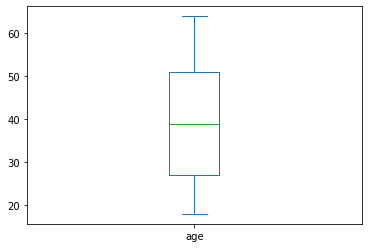

In [75]:
df['age'].plot.box()

<AxesSubplot:>

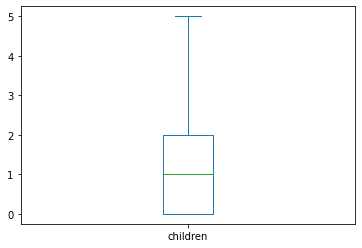

In [76]:
df['children'].plot.box()

<AxesSubplot:>

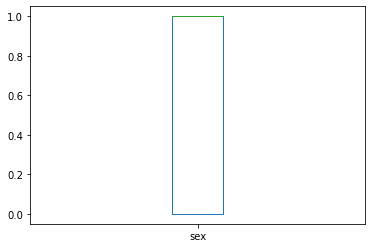

In [77]:
df['sex'].plot.box()

<AxesSubplot:>

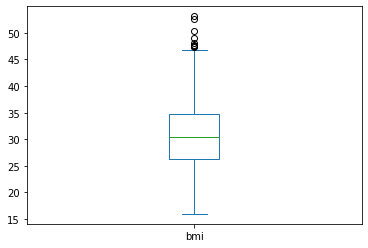

In [78]:
df['bmi'].plot.box()

<AxesSubplot:>

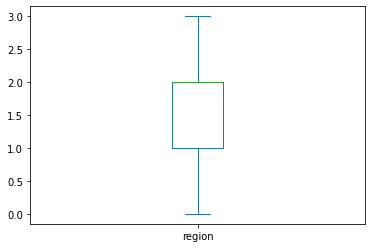

In [79]:
df['region'].plot.box()

<AxesSubplot:>

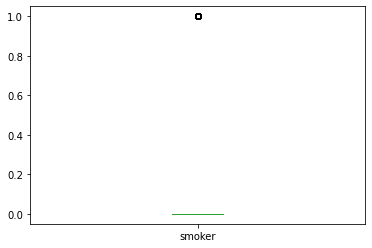

In [80]:
df['smoker'].plot.box()

<AxesSubplot:>

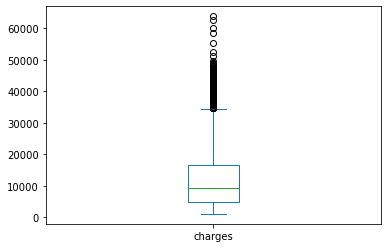

In [81]:
df['charges'].plot.box()

In [204]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)


(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2], dtype=int64))

In [205]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [206]:
df_new_z.shape

(1309, 7)

In [207]:
df.shape

(1338, 7)

In [208]:
data_loss=((1338-1309)/1338)*100
data_loss

2.167414050822123

In [209]:
y=df['charges']
x=df.drop('charges',axis=1)

In [210]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [211]:
for i in range(0,100):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20, random_state= i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"at random_state{i}, the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"at random_state{i}, the testing accuracy is :-{r2_score(y_test,pred_test)}")
    print('\n')

at random_state0, the training accuracy is :-0.7368306228430945
at random_state0, the testing accuracy is :-0.7998747145449959


at random_state1, the training accuracy is :-0.7475615631933097
at random_state1, the testing accuracy is :-0.7623224022563388


at random_state2, the training accuracy is :-0.7519923667088932
at random_state2, the testing accuracy is :-0.7445422986536503


at random_state3, the training accuracy is :-0.7530732192579027
at random_state3, the testing accuracy is :-0.7406256738597918


at random_state4, the training accuracy is :-0.7605730367332922
at random_state4, the testing accuracy is :-0.6970099489172213


at random_state5, the training accuracy is :-0.742751800397326
at random_state5, the testing accuracy is :-0.7790865933969187


at random_state6, the training accuracy is :-0.7433828393740967
at random_state6, the testing accuracy is :-0.7785295914318422


at random_state7, the training accuracy is :-0.7465780121439667
at random_state7, the testing accu

In [212]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=44)

In [213]:
lr.fit(x_train, y_train)

LinearRegression()

In [221]:
pred_test=lr.predict(x_test)

In [219]:
print(r2_score(y_test,pred_test))

0.7467311941745088


In [222]:
train_accuracy= r2_score(y_train,pred_train)
test_accuracy= r2_score(y_test,pred_test)

ValueError: Found input variables with inconsistent numbers of samples: [1003, 1070]

In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
for j in (2,10):
    cv_score=cross_val_score(lr, x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At cross fold {j} the cv score is {cv_mean} and accuracy score for train is {train_accuracy} and accuracy score for test is {test_accuracy}")
    print('\n')

NameError: name 'train_accuracy' is not defined

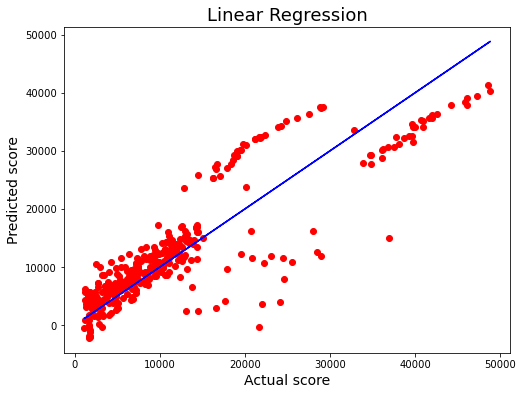

In [223]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test, y_test, color= 'b')
plt.xlabel('Actual score', fontsize=14)
plt.ylabel('Predicted score', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.savefig('lr.png')
plt.show()

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [4]:
parameters={'alpha':[.0001,.001, .01,.1,1,10], 'C':[.01,1,10,100], 'kernel':['linear'],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

NameError: name 'x_train' is not defined

In [226]:
ls=Lasso(alpha=.0001, random_state=0)
ls.fit(x_train, y_train)
ls_score_training=ls.score(x_train, y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

75.11290206196489

In [227]:
pred_ls=ls.predict(x_test)

In [228]:
lss=r2_score(y_test,pred_ls)
lss*100

74.67311985677951

In [229]:
cv_score= cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

74.72559481557735